In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-baseline-cnn/keras/default/1/best_baseline_cnn.h5
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kagg

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

base_path = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# Display directory structure
for root_dir in ['train', 'test', 'val']:
    path = os.path.join(base_path, root_dir)
    if os.path.exists(path):
        print(f"\n{root_dir}:")
        for category in os.listdir(path):
            category_path = os.path.join(path, category)
            if os.path.isdir(category_path):
                num_files = len(os.listdir(category_path))
                print(f"  {category}: {num_files} files")


train:
  PNEUMONIA: 3875 files
  NORMAL: 1341 files

test:
  PNEUMONIA: 390 files
  NORMAL: 234 files

val:
  PNEUMONIA: 8 files
  NORMAL: 8 files


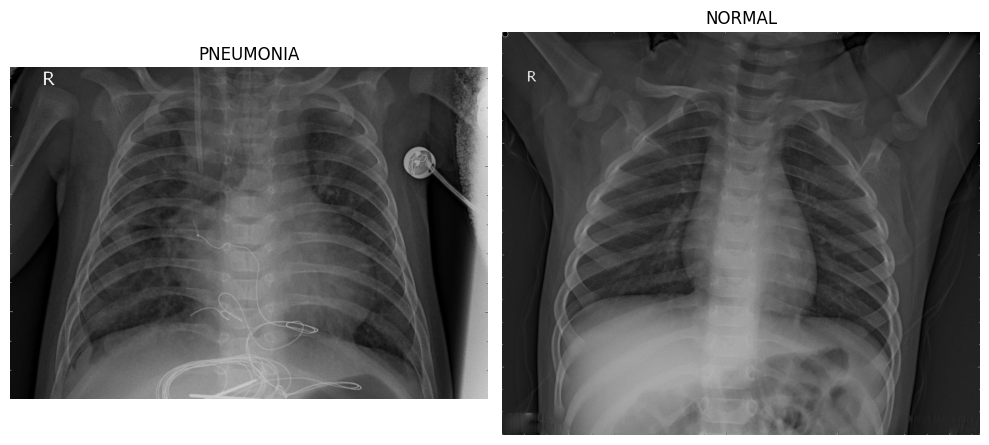

In [3]:
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Load and display PNEUMONIA image
pneumonia_path = os.path.join(base_path, 'train/PNEUMONIA')
pneumonia_img = Image.open(os.path.join(pneumonia_path, os.listdir(pneumonia_path)[0])).convert('L')
axes[0].imshow(pneumonia_img, cmap='gray')
axes[0].set_title('PNEUMONIA')
axes[0].axis('off')

# Load and display NORMAL image
normal_path = os.path.join(base_path, 'train/NORMAL')
normal_img = Image.open(os.path.join(normal_path, os.listdir(normal_path)[0])).convert('L')
axes[1].imshow(normal_img, cmap='gray')
axes[1].set_title('NORMAL')
axes[1].axis('off')

plt.tight_layout()
plt.show()

chia lại train/val

In [4]:
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn gốc
original_train = os.path.join(base_path, 'train')
original_val = os.path.join(base_path, 'val')

# Tạo thư mục mới cho train và val
new_base = 'chest_xray_split'
os.makedirs(new_base, exist_ok=True)

for category in ['NORMAL', 'PNEUMONIA']:
    os.makedirs(os.path.join(new_base, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(new_base, 'val', category), exist_ok=True)

# Gộp train và val cũ, sau đó chia lại 9:1
for category in ['NORMAL', 'PNEUMONIA']:
    # Lấy tất cả file từ train và val cũ
    all_files = []
    
    train_cat = os.path.join(original_train, category)
    if os.path.exists(train_cat):
        all_files.extend([os.path.join(train_cat, f) for f in os.listdir(train_cat)])
    
    val_cat = os.path.join(original_val, category)
    if os.path.exists(val_cat):
        all_files.extend([os.path.join(val_cat, f) for f in os.listdir(val_cat)])
    
    # Chia lại 9:1
    train_files, val_files = train_test_split(all_files, test_size=0.1, random_state=42)
    
    # Copy file vào thư mục mới
    for f in train_files:
        shutil.copy(f, os.path.join(new_base, 'train', category, os.path.basename(f)))
    
    for f in val_files:
        shutil.copy(f, os.path.join(new_base, 'val', category, os.path.basename(f)))

# Copy test giữ nguyên
shutil.copytree(os.path.join(base_path, 'test'), os.path.join(new_base, 'test'), dirs_exist_ok=True)

print("Hoàn thành chia dữ liệu!")


Hoàn thành chia dữ liệu!


In [5]:
# Tạo bảng thống kê
data = []
for split in ['train', 'val', 'test']:
    for category in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(new_base, split, category)
        count = len(os.listdir(path))
        data.append({'Split': split, 'Category': category, 'Count': count})

df = pd.DataFrame(data)
df_pivot = df.pivot(index='Category', columns='Split', values='Count')
df_pivot = df_pivot[['train', 'val', 'test']]  # Sắp xếp cột
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot.loc['Total'] = df_pivot.sum()

print("\nBảng thống kê dữ liệu:")
print(df_pivot)



Bảng thống kê dữ liệu:
Split      train  val  test  Total
Category                          
NORMAL      1214  135   234   1583
PNEUMONIA   3494  389   390   4273
Total       4708  524   624   5856


Số lượng ảnh trong tập train:
  NORMAL: 1214
  PNEUMONIA: 3494
  Tổng: 4708

Tỉ lệ PNEUMONIA/NORMAL: 2.88


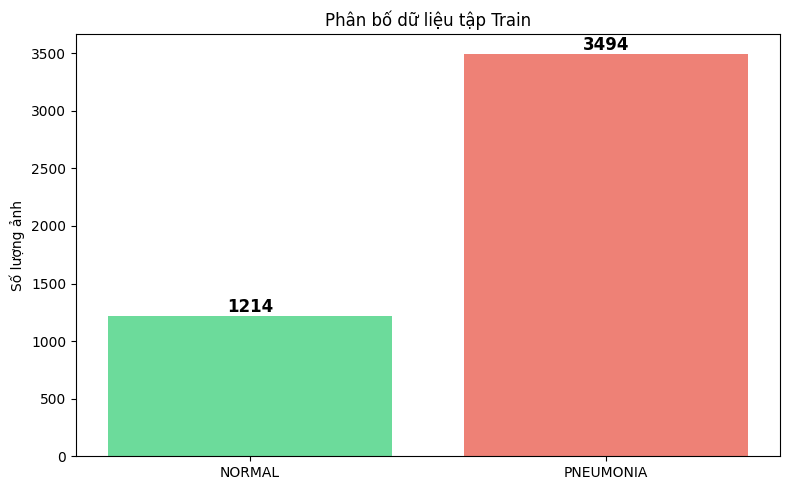

In [6]:
# Khám phá dữ liệu tập train
train_path = os.path.join(new_base, 'train')

# Đếm số lượng ảnh mỗi class
normal_count = len(os.listdir(os.path.join(train_path, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))

print(f"Số lượng ảnh trong tập train:")
print(f"  NORMAL: {normal_count}")
print(f"  PNEUMONIA: {pneumonia_count}")
print(f"  Tổng: {normal_count + pneumonia_count}")
print(f"\nTỉ lệ PNEUMONIA/NORMAL: {pneumonia_count/normal_count:.2f}")

# Biểu đồ phân bố
fig, ax = plt.subplots(figsize=(8, 5))
categories = ['NORMAL', 'PNEUMONIA']
counts = [normal_count, pneumonia_count]
colors = ['#2ecc71', '#e74c3c']

bars = ax.bar(categories, counts, color=colors, alpha=0.7)
ax.set_ylabel('Số lượng ảnh')
ax.set_title('Phân bố dữ liệu tập Train')

# Thêm số lượng trên mỗi cột
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


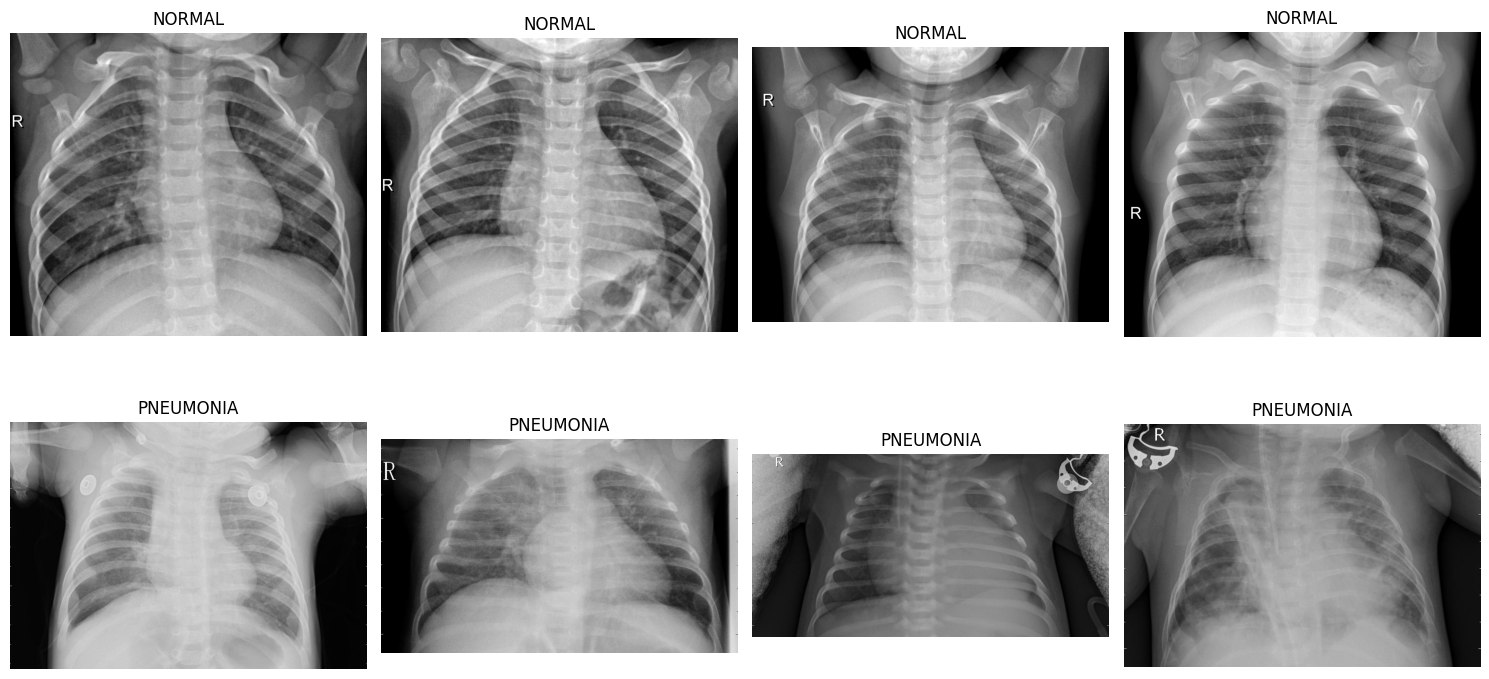

In [7]:
# Hiển thị một số ảnh mẫu từ tập train
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Hiển thị 4 ảnh NORMAL
normal_files = os.listdir(os.path.join(train_path, 'NORMAL'))[:4]
for i, filename in enumerate(normal_files):
    img = Image.open(os.path.join(train_path, 'NORMAL', filename)).convert('L')
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title('NORMAL', fontsize=12)
    axes[0, i].axis('off')

# Hiển thị 4 ảnh PNEUMONIA
pneumonia_files = os.listdir(os.path.join(train_path, 'PNEUMONIA'))[:4]
for i, filename in enumerate(pneumonia_files):
    img = Image.open(os.path.join(train_path, 'PNEUMONIA', filename)).convert('L')
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title('PNEUMONIA', fontsize=12)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [8]:
# Phân tích kích thước ảnh
print("Phân tích kích thước ảnh trong tập train:\n")

sizes = []
for category in ['NORMAL', 'PNEUMONIA']:
    cat_path = os.path.join(train_path, category)
    files = os.listdir(cat_path)[:100]  # Lấy mẫu 100 ảnh
    
    for filename in files:
        img = Image.open(os.path.join(cat_path, filename))
        sizes.append(img.size)

widths = [s[0] for s in sizes]
heights = [s[1] for s in sizes]

print(f"Kích thước ảnh (dựa trên 200 ảnh mẫu):")
print(f"  Chiều rộng - Min: {min(widths)}, Max: {max(widths)}, Trung bình: {sum(widths)/len(widths):.0f}")
print(f"  Chiều cao - Min: {min(heights)}, Max: {max(heights)}, Trung bình: {sum(heights)/len(heights):.0f}")


Phân tích kích thước ảnh trong tập train:

Kích thước ảnh (dựa trên 200 ảnh mẫu):
  Chiều rộng - Min: 438, Max: 2633, Trung bình: 1428
  Chiều cao - Min: 179, Max: 2578, Trung bình: 1099


In [9]:
# Xử lý mất cân bằng dữ liệu bằng Class Weights
from sklearn.utils.class_weight import compute_class_weight

# Tính class weights
total = normal_count + pneumonia_count
weight_normal = total / (2 * normal_count)
weight_pneumonia = total / (2 * pneumonia_count)

print("Xử lý mất cân bằng dữ liệu bằng Class Weights")
print("=" * 50)
print(f"\nTỉ lệ dữ liệu:")
print(f"  NORMAL: {normal_count} ({normal_count/total*100:.1f}%)")
print(f"  PNEUMONIA: {pneumonia_count} ({pneumonia_count/total*100:.1f}%)")

print(f"\nClass Weights (dùng trong model):")
print(f"  NORMAL (class 0): {weight_normal:.3f}")
print(f"  PNEUMONIA (class 1): {weight_pneumonia:.3f}")

class_weights = {0: weight_normal, 1: weight_pneumonia}
print(f"\nDict cho Keras/TensorFlow:")
print(f"  class_weight = {class_weights}")

print("\n✓ Class weights sẽ tự động cân bằng ảnh hưởng của 2 class khi training")
print("✓ Giữ nguyên toàn bộ dữ liệu thật - phù hợp cho bài toán y học")


Xử lý mất cân bằng dữ liệu bằng Class Weights

Tỉ lệ dữ liệu:
  NORMAL: 1214 (25.8%)
  PNEUMONIA: 3494 (74.2%)

Class Weights (dùng trong model):
  NORMAL (class 0): 1.939
  PNEUMONIA (class 1): 0.674

Dict cho Keras/TensorFlow:
  class_weight = {0: 1.9390444810543657, 1: 0.6737263880938752}

✓ Class weights sẽ tự động cân bằng ảnh hưởng của 2 class khi training
✓ Giữ nguyên toàn bộ dữ liệu thật - phù hợp cho bài toán y học


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rest of your code remains the same
base_path = '/kaggle/working/chest_xray_split'
IMG_SIZE = 224
BATCH_SIZE = 32

model = keras.models.load_model('/kaggle/input/best-baseline-cnn/keras/default/1/best_baseline_cnn.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    color_mode='grayscale'
)

print(f"Test samples: {test_generator.samples}")
print("✓ Model và test data đã sẵn sàng")


Found 624 images belonging to 2 classes.
Test samples: 624
✓ Model và test data đã sẵn sàng
Test samples: 624
✓ Model và test data đã sẵn sàng


In [16]:
# Dự đoán trên toàn bộ test set
test_generator.reset()
y_pred_proba = model.predict(test_generator, verbose=0)
y_true = test_generator.classes

print(f"Predictions shape: {y_pred_proba.shape}")
print(f"True labels shape: {y_true.shape}")
print(f"Sample predictions (first 5): {y_pred_proba[:5].flatten()}")
print(f"Sample true labels (first 5): {y_true[:5]}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1763465586.479274     129 service.cc:148] XLA service 0x79b800004280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763465586.480264     129 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763465586.646567     129 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763465586.479274     129 service.cc:148] XLA service 0x79b800004280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763465586.480264     129 service.cc:156]   StreamExecutor device (0

Predictions shape: (624, 1)
True labels shape: (624,)
Sample predictions (first 5): [0.00174827 0.00140068 0.00437401 0.06461675 0.0032332 ]
Sample true labels (first 5): [0 0 0 0 0]


In [17]:
# Tính toán ROC curve và AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"\nAUC Score: {roc_auc:.4f}")
print(f"FPR (False Positive Rate) shape: {fpr.shape}")
print(f"TPR (True Positive Rate) shape: {tpr.shape}")


AUC Score: 0.9529
FPR (False Positive Rate) shape: (102,)
TPR (True Positive Rate) shape: (102,)


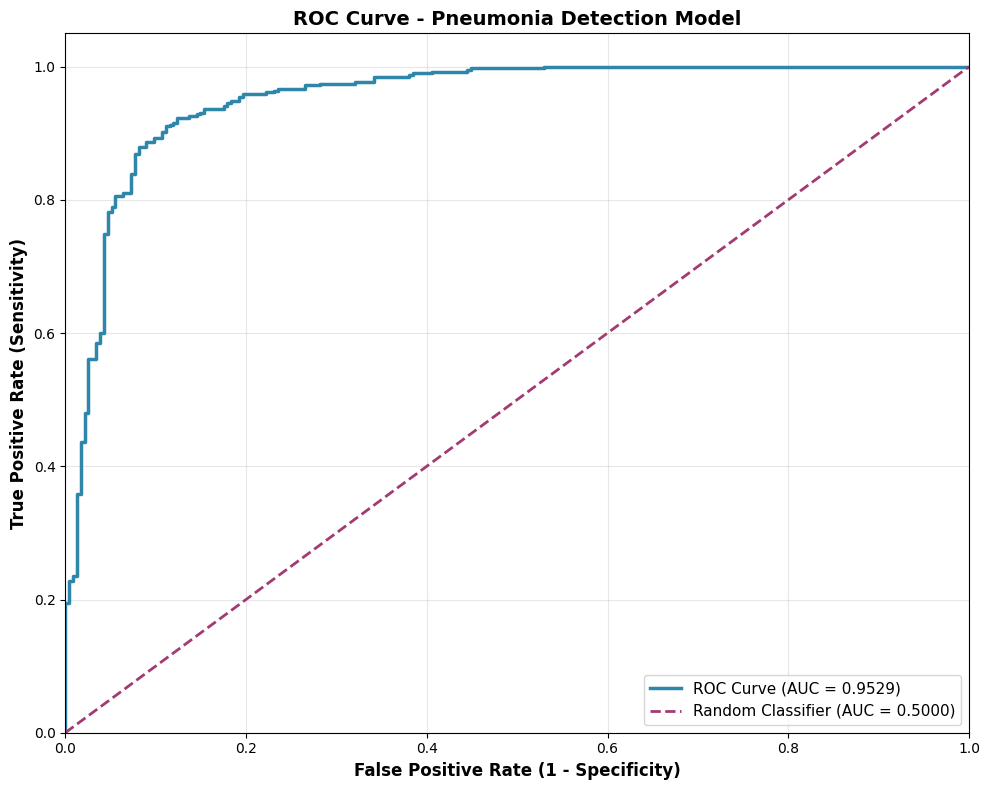


✓ AUC Score: 0.9529


In [18]:
# Vẽ ROC Curve (AUC)
from sklearn.metrics import roc_curve, auc

# Dự đoán trên toàn bộ test set
test_generator.reset()
y_pred_proba = model.predict(test_generator, verbose=0)
y_true = test_generator.classes

# Tính toán ROC curve và AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Vẽ ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#2E86AB', lw=2.5, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='#A23B72', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5000)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
plt.title('ROC Curve - Pneumonia Detection Model', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✓ AUC Score: {roc_auc:.4f}")

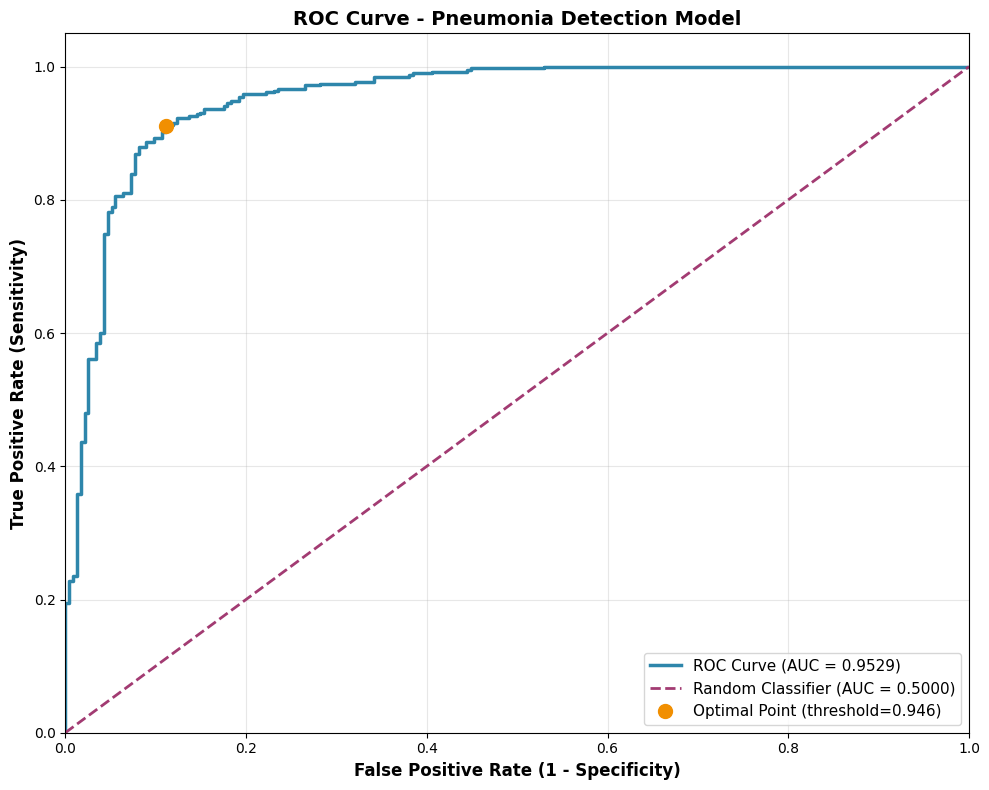


✓ ROC Curve vẽ thành công!
✓ AUC Score: 0.9529
✓ Optimal threshold: 0.9465


In [19]:

# Vẽ ROC Curve
plt.figure(figsize=(10, 8))

# Plot ROC curve
plt.plot(fpr, tpr, color='#2E86AB', lw=2.5, label=f'ROC Curve (AUC = {roc_auc:.4f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='#A23B72', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5000)')

# Customization
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
plt.title('ROC Curve - Pneumonia Detection Model', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)

# Add optimal point marker
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'o', markersize=10, 
         color='#F18F01', label=f'Optimal Point (threshold={optimal_threshold:.3f})')
plt.legend(loc="lower right", fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n✓ ROC Curve vẽ thành công!")
print(f"✓ AUC Score: {roc_auc:.4f}")
print(f"✓ Optimal threshold: {optimal_threshold:.4f}")

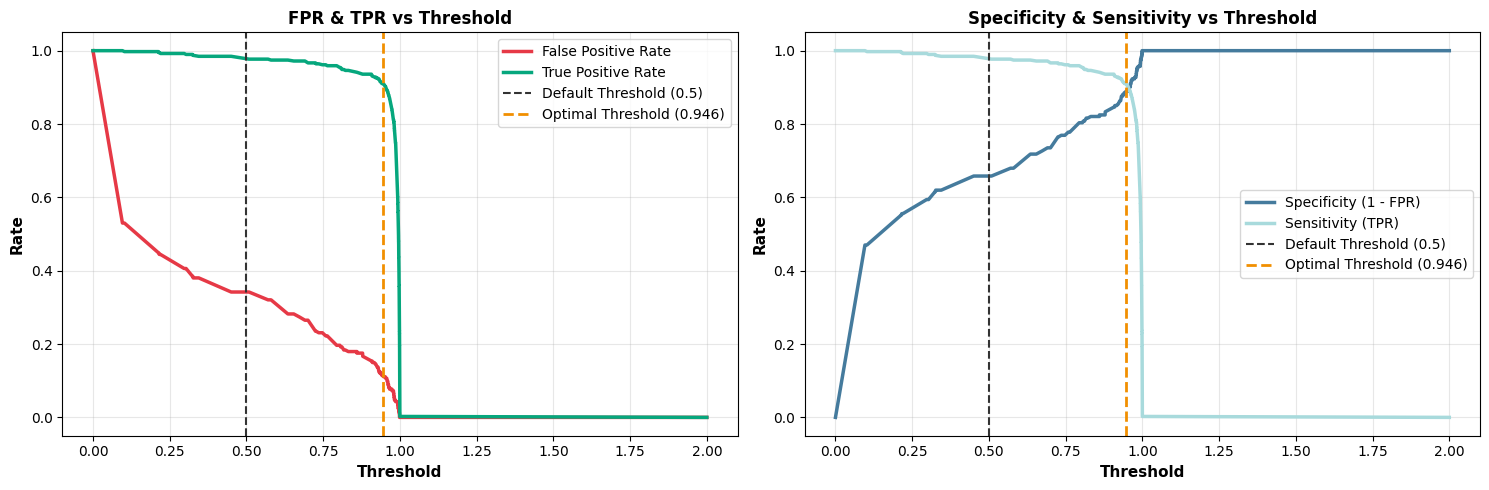


✓ Biểu đồ chi tiết vẽ thành công!


In [20]:
# Biểu đồ chi tiết về FPR và TPR tại các threshold khác nhau
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: FPR vs Threshold
axes[0].plot(thresholds, fpr, color='#E63946', lw=2.5, label='False Positive Rate')
axes[0].plot(thresholds, tpr, color='#06A77D', lw=2.5, label='True Positive Rate')
axes[0].axvline(x=0.5, color='#333333', linestyle='--', lw=1.5, label='Default Threshold (0.5)')
axes[0].axvline(x=optimal_threshold, color='#F18F01', linestyle='--', lw=2, label=f'Optimal Threshold ({optimal_threshold:.3f})')
axes[0].set_xlabel('Threshold', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Rate', fontsize=11, fontweight='bold')
axes[0].set_title('FPR & TPR vs Threshold', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Specificity vs Sensitivity
specificity = 1 - fpr  # Specificity = 1 - FPR
sensitivity = tpr  # Sensitivity = TPR

axes[1].plot(thresholds, specificity, color='#457B9D', lw=2.5, label='Specificity (1 - FPR)')
axes[1].plot(thresholds, sensitivity, color='#A8DADC', lw=2.5, label='Sensitivity (TPR)')
axes[1].axvline(x=0.5, color='#333333', linestyle='--', lw=1.5, label='Default Threshold (0.5)')
axes[1].axvline(x=optimal_threshold, color='#F18F01', linestyle='--', lw=2, label=f'Optimal Threshold ({optimal_threshold:.3f})')
axes[1].set_xlabel('Threshold', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Rate', fontsize=11, fontweight='bold')
axes[1].set_title('Specificity & Sensitivity vs Threshold', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Biểu đồ chi tiết vẽ thành công!")

In [21]:
# Tóm tắt các chỉ số tại threshold khác nhau
print("\n" + "="*70)
print("TÓM TẮT CÁC CHỈ SỐ TẠI THRESHOLD KHÁC NHAU")
print("="*70)

# Tại threshold mặc định (0.5)
idx_default = np.argmin(np.abs(thresholds - 0.5))
print(f"\nTại threshold = 0.5000 (mặc định):")
print(f"  - TPR (Sensitivity): {tpr[idx_default]:.4f}")
print(f"  - FPR: {fpr[idx_default]:.4f}")
print(f"  - Specificity: {1 - fpr[idx_default]:.4f}")

# Tại optimal threshold
print(f"\nTại threshold = {optimal_threshold:.4f} (tối ưu - maximize TPR - FPR):")
print(f"  - TPR (Sensitivity): {tpr[optimal_idx]:.4f}")
print(f"  - FPR: {fpr[optimal_idx]:.4f}")
print(f"  - Specificity: {1 - fpr[optimal_idx]:.4f}")

# AUC
print(f"\n{'='*70}")
print(f"AUC (Area Under the Curve): {roc_auc:.4f}")
print(f"Interpretation: Model có độ chính xác {roc_auc*100:.2f}% trong việc")
print(f"phân biệt giữa bệnh nhân bình thường và bệnh nhân viêm phổi")
print("="*70)


TÓM TẮT CÁC CHỈ SỐ TẠI THRESHOLD KHÁC NHAU

Tại threshold = 0.5000 (mặc định):
  - TPR (Sensitivity): 0.9769
  - FPR: 0.3419
  - Specificity: 0.6581

Tại threshold = 0.9465 (tối ưu - maximize TPR - FPR):
  - TPR (Sensitivity): 0.9103
  - FPR: 0.1111
  - Specificity: 0.8889

AUC (Area Under the Curve): 0.9529
Interpretation: Model có độ chính xác 95.29% trong việc
phân biệt giữa bệnh nhân bình thường và bệnh nhân viêm phổi
